In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

from collections import Counter
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [120]:
# Load the data
file_path = 'twitter_posts_with_timestamps_3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,PostText,Timestamp
0,I know #China makes good things. And I know th...,2024-08-07T05:02:49.000Z
1,#Singapore: Operators reminded of guidelines o...,2024-08-05T12:54:31.000Z
2,"#Singapore Doors, seats and map displays from ...",2024-07-26T08:14:35.000Z
3,"MRT East West Line train, arriving at Bedok St...",2024-07-25T15:55:07.000Z
4,#Singapore LTA and rail operators working to i...,2024-07-03T05:08:11.000Z


In [144]:
# Handling missing values
data.dropna(subset=['PostText'], inplace=True)

# Convert text to lowercase
data['PostText'] = data['PostText'].str.lower()

# Tokenize the text (before preprocessing)
data['tokens_before_preprocessing'] = data['PostText'].apply(word_tokenize)

# Count the total number of words before preprocessing
total_words_before = data['tokens_before_preprocessing'].apply(len).sum()
print(f"Total number of words before preprocessing: {total_words_before}")

# Remove URLs
data['PostText'] = data['PostText'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove punctuation and numbers
data['PostText'] = data['PostText'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove stopwords and short words
stop_words = set(stopwords.words('english'))
custom_stopwords = set([ "train","smrt","station","singapore","mrt","tweet",'singaporetrains',"photo","line","subway","thread","oct","get","taken"])
data['PostText'] = data['PostText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in custom_stopwords and len(word) > 2]))

# Tokenization (after removing stopwords)
data['tokens_after_stopwords'] = data['PostText'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['tokens_after_preprocessing'] = data['tokens_after_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Joining the tokens back to form strings
data['PostText'] = data['tokens_after_preprocessing'].apply(lambda x: ' '.join(x))

# Count the total number of words after preprocessing
total_words_after = data['tokens_after_preprocessing'].apply(len).sum()
print(f"Total number of words after preprocessing: {total_words_after}")

# Display the first few rows after preprocessing
data.head()


Total number of words before preprocessing: 7977
Total number of words after preprocessing: 7927


,PostText,Timestamp,tokens_before_preprocessing,tokens_after_stopwords,tokens_after_preprocessing,Sentiment_value,Sentiment_Text,Dominant_Topic
0,know china make good thing know motsg like say...,2024-08-07T05:02:49.000Z,"[know, china, make, good, thing, know, motsg, ...","[know, china, make, good, thing, know, motsg, ...","[know, china, make, good, thing, know, motsg, ...",0.6597,positive,4
1,operator reminded guideline photography videog...,2024-08-05T12:54:31.000Z,"[operator, reminded, guideline, photography, v...","[operator, reminded, guideline, photography, v...","[operator, reminded, guideline, photography, v...",0.0000,neutral,2
2,door seat map display preserved national museu...,2024-07-26T08:14:35.000Z,"[door, seat, map, display, preserved, national...","[door, seat, map, display, preserved, national...","[door, seat, map, display, preserved, national...",0.5719,positive,4
3,east west arriving bedok going tuas link eastw...,2024-07-25T15:55:07.000Z,"[east, west, arriving, bedok, going, tuas, lin...","[east, west, arriving, bedok, going, tuas, lin...","[east, west, arriving, bedok, going, tuas, lin...",0.0000,neutral,3
4,lta rail operator working improve crowd contro...,2024-07-03T05:08:11.000Z,"[lta, rail, operator, working, improve, crowd,...","[lta, rail, operator, working, improve, crowd,...","[lta, rail, operator, working, improve, crowd,...",-0.0516,negative,3


In [145]:
# File path where the CSV will be saved
file_path = 'processed_text_1.csv'

# Write the DataFrame to a CSV file
data.to_csv(file_path, index=False)

print(f"DataFrame has been written to {file_path}")

DataFrame has been written to processed_text_1.csv


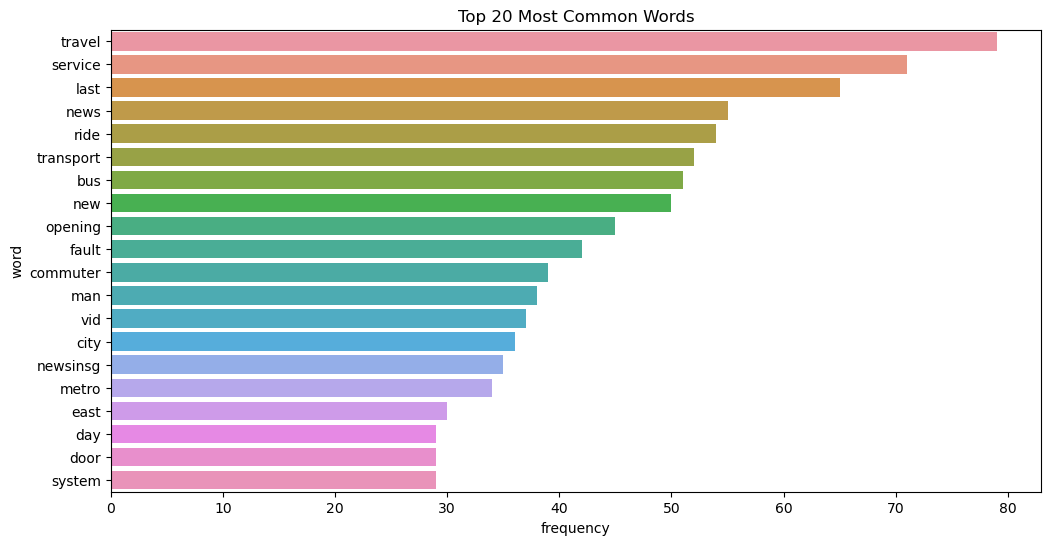

In [146]:
# Join all the text data into a single string
all_words = ' '.join(data['PostText'])

# Tokenize the combined string
all_words_tokens = all_words.split()

# Create a frequency distribution
word_freq = Counter(all_words_tokens)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(20))
plt.title('Top 20 Most Common Words')
plt.show()


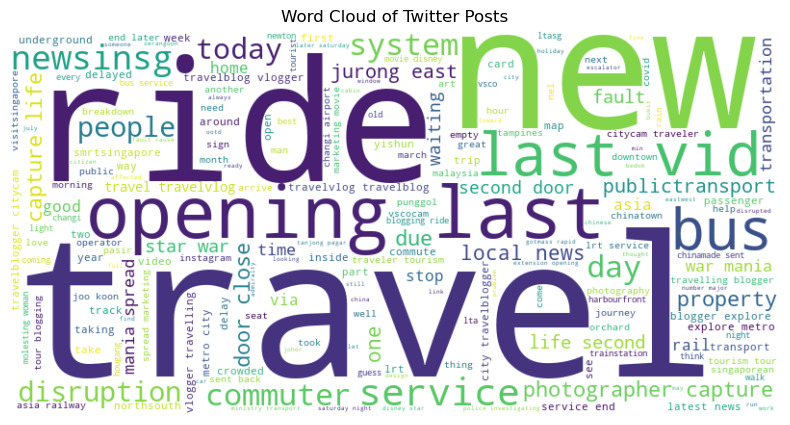

In [148]:

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Twitter Posts')
plt.show()


In [128]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

data['Sentiment_value'] = data['PostText'].apply(get_sentiment_vader)

In [129]:
print(data[['PostText', 'Sentiment_value']])

                                              PostText  Sentiment_value
0    know china make good thing know motsg like say...           0.6597
1    operator reminded guideline photography videog...           0.0000
2    door seat map display preserved national museu...           0.5719
3    east west line arriving bedok going tuas link ...           0.0000
4    lta rail operator working improve crowd contro...          -0.0516
..                                                 ...              ...
992  standard review commuter expect fewer disrupti...          -0.3612
993  waiting sandwizinsg travel sightseeing tanjong...           0.0000
994   standard review commuter expect fewer disruption          -0.3612
995  newsinsg standard review commuter expect fewer...          -0.3612
996         lovely clean air conditioned pleasure ride           0.8807

[997 rows x 2 columns]


In [130]:
def categorize_sentiment(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'
    
# Add Sentiment_Text column based on Sentiment_2
data['Sentiment_Text'] = data['Sentiment_value'].apply(categorize_sentiment)


In [131]:
# File path where the CSV will be saved
file_path = 'sentiment_analysis_results_1.csv'

# Write the DataFrame to a CSV file
data.to_csv(file_path, index=False)

print(f"DataFrame has been written to {file_path}")

DataFrame has been written to sentiment_analysis_results_1.csv


In [132]:
data.sample(5)

,PostText,Timestamp,tokens_before_preprocessing,tokens_after_stopwords,tokens_after_preprocessing,Sentiment_value,Sentiment_Text
907,vimitherapy doesnt anyone sing brink breaking ...,2015-03-12T15:03:37.000Z,"[vimitherapy, doesnt, anyone, sing, brink, bre...","[vimitherapy, doesnt, anyone, sing, brink, bre...","[vimitherapy, doesnt, anyone, sing, brink, bre...",0.0000,neutral
927,trippy travel circleline exploresingapore mada...,2015-02-17T09:42:00.000Z,"[trippy, travel, circleline, exploresingapore,...","[trippy, travel, circleline, exploresingapore,...","[trippy, travel, circleline, exploresingapore,...",0.0000,neutral
458,head style sembawang transportation speed rapi...,2016-09-29T03:58:17.000Z,"[train, head, style, sembawang, transportation...","[head, style, sembawang, transportation, speed...","[head, style, sembawang, transportation, speed...",0.0000,neutral
177,sign english chinese malay tamil another sign ...,2018-11-24T08:28:16.000Z,"[sign, english, chinese, malay, tamil, another...","[sign, english, chinese, malay, tamil, another...","[sign, english, chinese, malay, tamil, another...",0.0000,neutral
166,travel singaporedestinationsmap come across we...,2019-05-01T03:58:27.000Z,"[travel, singaporedestinationsmap, come, acros...","[travel, singaporedestinationsmap, come, acros...","[travel, singaporedestinationsmap, come, acros...",0.6124,positive


# Data modeling

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

**Text Vectorization using TF-IDF**

In [42]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data
X = tfidf.fit_transform(data['PostText']).toarray()

# Target variable
y = data['Sentiment_Text']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Logistic Regression**

In [44]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Hyper-parameter tuning using GridSearchCV
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the model
grid_log_reg.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters for Logistic Regression: {grid_log_reg.best_params_}")
print(f"Best cross-validated accuracy: {grid_log_reg.best_score_}")

# Predict on test data
y_pred_log_reg = grid_log_reg.predict(X_test)


C:\Users\qiyua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qiyua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters for Logistic Regression: {'C': 100}
Best cross-validated accuracy: 0.7733812949640289


C:\Users\qiyua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [45]:
# Initialize Random Forest model
rf = RandomForestClassifier()

# Hyper-parameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best cross-validated accuracy: {grid_rf.best_score_}")

# Predict on test data
y_pred_rf = grid_rf.predict(X_test)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated accuracy: 0.77327852004111


**XGBoost**

In [48]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify the encoding
print(f"Classes: {label_encoder.classes_}")
print(f"Encoded labels: {np.unique(y_train_encoded)}")

Classes: ['negative' 'neutral' 'positive']
Encoded labels: [0 1 2]


In [50]:
# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='mlogloss')

# Hyper-parameter tuning using GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model
grid_xgb.fit(X_train, y_train_encoded)

# Best parameters and accuracy
print(f"Best parameters for XGBoost: {grid_xgb.best_params_}")
print(f"Best cross-validated accuracy: {grid_xgb.best_score_}")

# Predict on test data
y_pred_xgb = grid_xgb.predict(X_test)


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validated accuracy: 0.7575334018499486


**Evaluation**

In [51]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(f"ROC-AUC Score: {roc_auc_score(y_test, grid_log_reg.predict_proba(X_test), multi_class='ovr')}")


Logistic Regression Classification Report
              precision    recall  f1-score   support

    negative       0.88      0.76      0.82        88
     neutral       0.73      0.91      0.81       148
    positive       0.80      0.52      0.63        64

    accuracy                           0.78       300
   macro avg       0.81      0.73      0.75       300
weighted avg       0.79      0.78      0.77       300

Confusion Matrix:
[[ 67  21   0]
 [  6 134   8]
 [  3  28  33]]
ROC-AUC Score: 0.9228156132000173


In [52]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, grid_rf.predict_proba(X_test), multi_class='ovr')}")


Random Forest Classification Report
              precision    recall  f1-score   support

    negative       0.95      0.70      0.81        88
     neutral       0.71      0.96      0.81       148
    positive       0.88      0.47      0.61        64

    accuracy                           0.78       300
   macro avg       0.85      0.71      0.75       300
weighted avg       0.82      0.78      0.77       300

Confusion Matrix:
[[ 62  25   1]
 [  3 142   3]
 [  0  34  30]]
ROC-AUC Score: 0.9063679267575747


In [54]:
print("XGBoost Classification Report")
print(classification_report(y_test_encoded, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, grid_xgb.predict_proba(X_test), multi_class='ovr')}")


XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        88
           1       0.75      0.91      0.82       148
           2       0.74      0.50      0.60        64

    accuracy                           0.78       300
   macro avg       0.79      0.73      0.75       300
weighted avg       0.79      0.78      0.78       300

Confusion Matrix:
[[ 69  16   3]
 [  6 134   8]
 [  3  29  32]]
ROC-AUC Score: 0.8781907419890952


**RNN Model**

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


In [56]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable
y_train_encoded_categorical = to_categorical(y_train_encoded, num_classes=3)
y_test_encoded_categorical = to_categorical(y_test_encoded, num_classes=3)


In [57]:
# Define the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\qiyua\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       325,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,571 (1.27 MB)

 Trainable params: 333,571 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded_categorical, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_encoded_categorical))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded_categorical)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4516 - loss: 1.6395 - val_accuracy: 0.5433 - val_loss: 0.9514
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5104 - loss: 1.2838 - val_accuracy: 0.6500 - val_loss: 0.8175
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5970 - loss: 1.0640 - val_accuracy: 0.7133 - val_loss: 0.7181
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7145 - loss: 0.8224 - val_accuracy: 0.7200 - val_loss: 0.6556
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7943 - loss: 0.5746 - val_accuracy: 0.7200 - val_loss: 0.6209
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8154 - loss: 0.5040 - val_accuracy: 0.7567 - val_loss: 0.5910
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8618 - loss: 0.4368 - val_accuracy: 0.7500 - val_loss: 0.5703
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8743 - loss: 0.3585 - val_accuracy: 0.7567 - val_loss

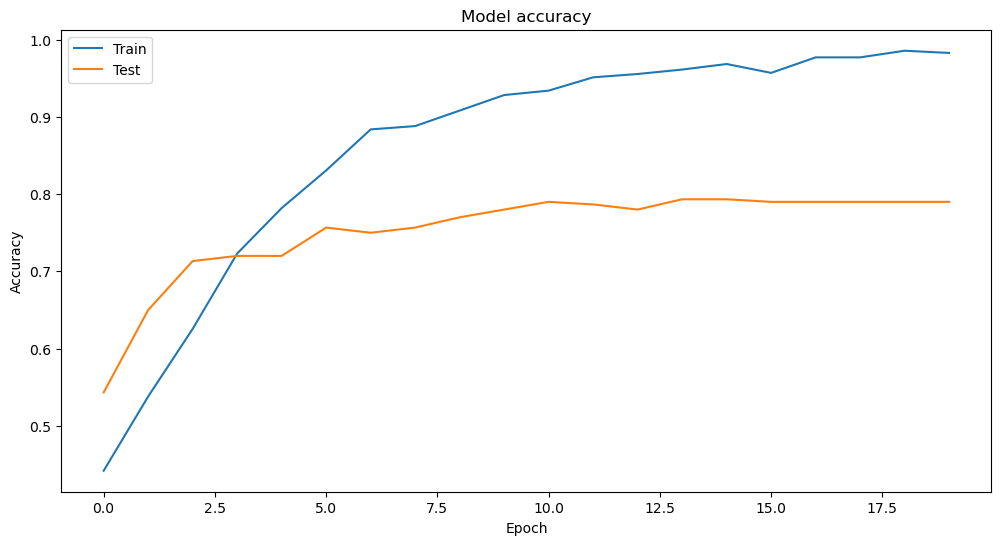

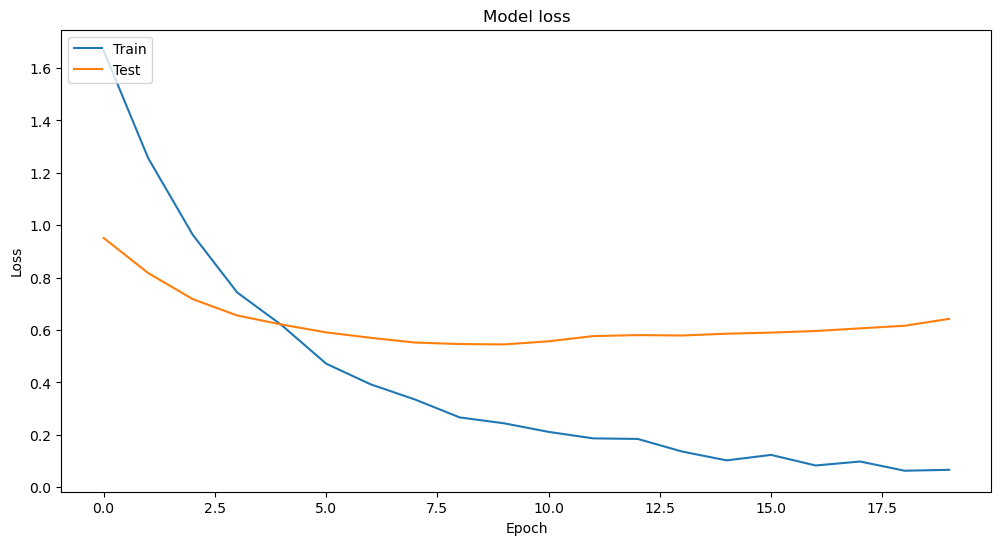

In [59]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [79]:
# Predict on the test set
y_pred_dl = model.predict(X_test_scaled)
y_pred_dl_classes = np.argmax(y_pred_dl, axis=1)

# Decode predictions to original labels
y_pred_dl_decoded = label_encoder.inverse_transform(y_pred_dl_classes)

# Evaluate the model using the decoded predictions
print("Classification Report for Deep Learning Model:")
print(classification_report(y_test, y_pred_dl_decoded))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dl_decoded))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report for Deep Learning Model:
              precision    recall  f1-score   support

    negative       0.82      0.80      0.81        88
     neutral       0.80      0.87      0.83       148
    positive       0.70      0.59      0.64        64

    accuracy                           0.79       300
   macro avg       0.78      0.75      0.76       300
weighted avg       0.79      0.79      0.79       300

Confusion Matrix:
[[ 70  12   6]
 [  9 129  10]
 [  6  20  38]]


## Appendix

In [99]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [107]:
# Load the data
file_path = 'twitter_posts_with_timestamps_3.csv'
data = pd.read_csv(file_path)

In [112]:
# Handling missing values
data.dropna(subset=['PostText'], inplace=True)

# Convert text to lowercase
data['PostText'] = data['PostText'].str.lower()

# Tokenize the text (before preprocessing)
data['tokens_before_preprocessing'] = data['PostText'].apply(word_tokenize)

# Count the total number of words before preprocessing
total_words_before = data['tokens_before_preprocessing'].apply(len).sum()
print(f"Total number of words before preprocessing: {total_words_before}")

# Remove URLs
data['PostText'] = data['PostText'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove punctuation and numbers
data['PostText'] = data['PostText'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove stopwords and short words
stop_words = set(stopwords.words('english'))
custom_stopwords = set([ "train","smrt","station","singapore","mrt","tweet","downtownline",'singaporetrains'])
data['PostText'] = data['PostText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in custom_stopwords and len(word) > 2]))

# Tokenization (after removing stopwords)
data['tokens_after_stopwords'] = data['PostText'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['tokens_after_preprocessing'] = data['tokens_after_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Joining the tokens back to form strings
data['PostText'] = data['tokens_after_preprocessing'].apply(lambda x: ' '.join(x))

# Count the total number of words after preprocessing
total_words_after = data['tokens_after_preprocessing'].apply(len).sum()
print(f"Total number of words after preprocessing: {total_words_after}")

# Display the first few rows after preprocessing
data.head()


Total number of words before preprocessing: 8800
Total number of words after preprocessing: 8318


,PostText,Timestamp,tokens_before_preprocessing,tokens_after_stopwords,tokens_after_preprocessing
0,know china make good thing know motsg like say...,2024-08-07T05:02:49.000Z,"[know, china, make, good, thing, know, motsg, ...","[know, china, make, good, thing, know, motsg, ...","[know, china, make, good, thing, know, motsg, ..."
1,operator reminded guideline photography videog...,2024-08-05T12:54:31.000Z,"[operator, reminded, guideline, photography, v...","[operator, reminded, guideline, photography, v...","[operator, reminded, guideline, photography, v..."
2,door seat map display preserved national museu...,2024-07-26T08:14:35.000Z,"[door, seat, map, display, preserved, national...","[door, seat, map, display, preserved, national...","[door, seat, map, display, preserved, national..."
3,east west line arriving bedok going tuas link ...,2024-07-25T15:55:07.000Z,"[east, west, line, arriving, bedok, going, tua...","[east, west, line, arriving, bedok, going, tua...","[east, west, line, arriving, bedok, going, tua..."
4,lta rail operator working improve crowd contro...,2024-07-03T05:08:11.000Z,"[lta, rail, operator, working, improve, crowd,...","[lta, rail, operator, working, improve, crowd,...","[lta, rail, operator, working, improve, crowd,..."


In [113]:
# Create a list of lists of tokens (assumes text is already tokenized and cleaned)
texts = data['PostText'].apply(word_tokenize).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Convert the documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [114]:
# Set parameters
num_topics = 5  # You can adjust the number of topics as needed

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, 
                                   num_topics=num_topics, 
                                   id2word=dictionary, 
                                   passes=10, 
                                   random_state=42)


In [115]:
# Print the topics with the top 10 words each
topics = lda_model.print_topics(num_words=10)
for i, topic in topics:
    print(f"Topic {i+1}: {topic}")


Topic 1: 0.088*"subway" + 0.078*"bus" + 0.050*"today" + 0.039*"star" + 0.037*"nel" + 0.036*"service" + 0.036*"night" + 0.035*"war" + 0.034*"one" + 0.034*"spread"
Topic 2: 0.095*"travel" + 0.066*"ride" + 0.052*"city" + 0.045*"metro" + 0.036*"subway" + 0.031*"travelling" + 0.028*"explore" + 0.028*"card" + 0.027*"tour" + 0.025*"take"
Topic 3: 0.106*"photo" + 0.098*"last" + 0.091*"thread" + 0.080*"taken" + 0.073*"opening" + 0.072*"oct" + 0.060*"vid" + 0.039*"man" + 0.024*"public" + 0.023*"video"
Topic 4: 0.052*"service" + 0.048*"commuter" + 0.043*"line" + 0.035*"life" + 0.035*"door" + 0.034*"close" + 0.033*"disruption" + 0.032*"get" + 0.031*"system" + 0.029*"fault"
Topic 5: 0.077*"news" + 0.050*"transport" + 0.049*"new" + 0.042*"asia" + 0.033*"local" + 0.032*"rail" + 0.028*"line" + 0.027*"property" + 0.025*"hougang" + 0.025*"waiting"


In [135]:
# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        dominant_topic = row[0][0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Apply to your dataset
data['Dominant_Topic'] = get_dominant_topic(lda_model, corpus)


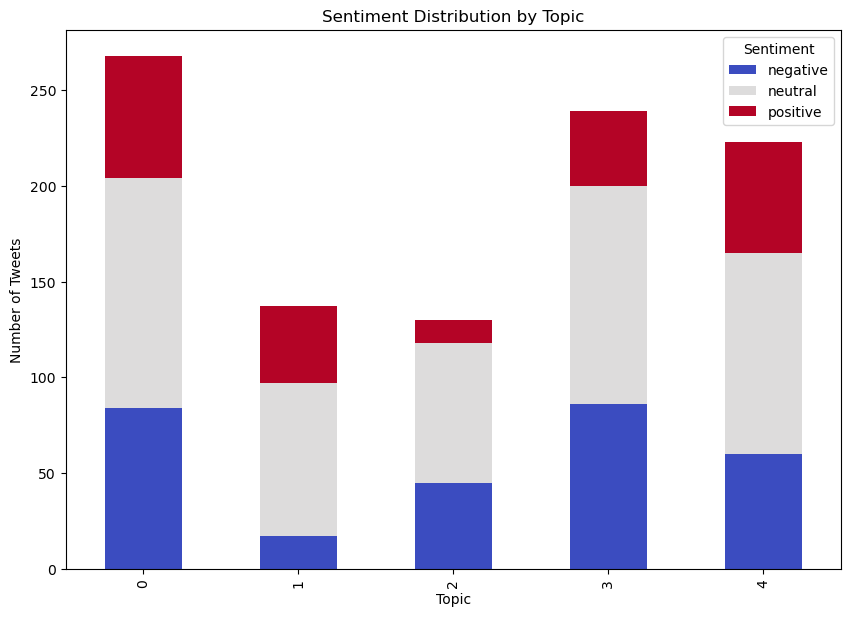

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by dominant topic and sentiment
topic_sentiment = data.groupby(['Dominant_Topic', 'Sentiment_Text']).size().unstack().fillna(0)

# Plot the sentiment distribution across topics
topic_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()
